## Project "Scooter rental service research"

### Project Description

In this project, we will analyze the data of the popular scooter rental service Go Fast. We were given data about some users from several cities, as well as about their trips.
To travel around the city, users of the GoFast service use a mobile application. You can use the service:

there is no subscription fee without a subscription;
the cost of one minute of the trip is 8 rubles;
the cost of the start (start of the trip) is 50 rubles;

with
an Ultra subscription, the subscription fee is 199 rubles per month;
the cost of one minute of the trip is 6 rubles;

the cost of the start is free.
We will try to analyze the data and test some hypotheses that can help the business grow.

### Data description
The master data contains information about users, their trips and subscriptions. There is also additional information about the number of user requests to the technical support of the service before and after updating the technical infrastructure.
Users — users_go.csv
Trips — rides_go.csv
Subscriptions — subscribtions_go.csv

#### Step 1. Uploading Data

In [1]:
# Importing the libraries that we will need in this project
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import binom

In [2]:
# Let's read the data from csv files into date frames and save it to the appropriate variables
try:
    users = pd.read_csv('users_go.csv')
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

pd.set_option('display.max_columns', None)

In [3]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


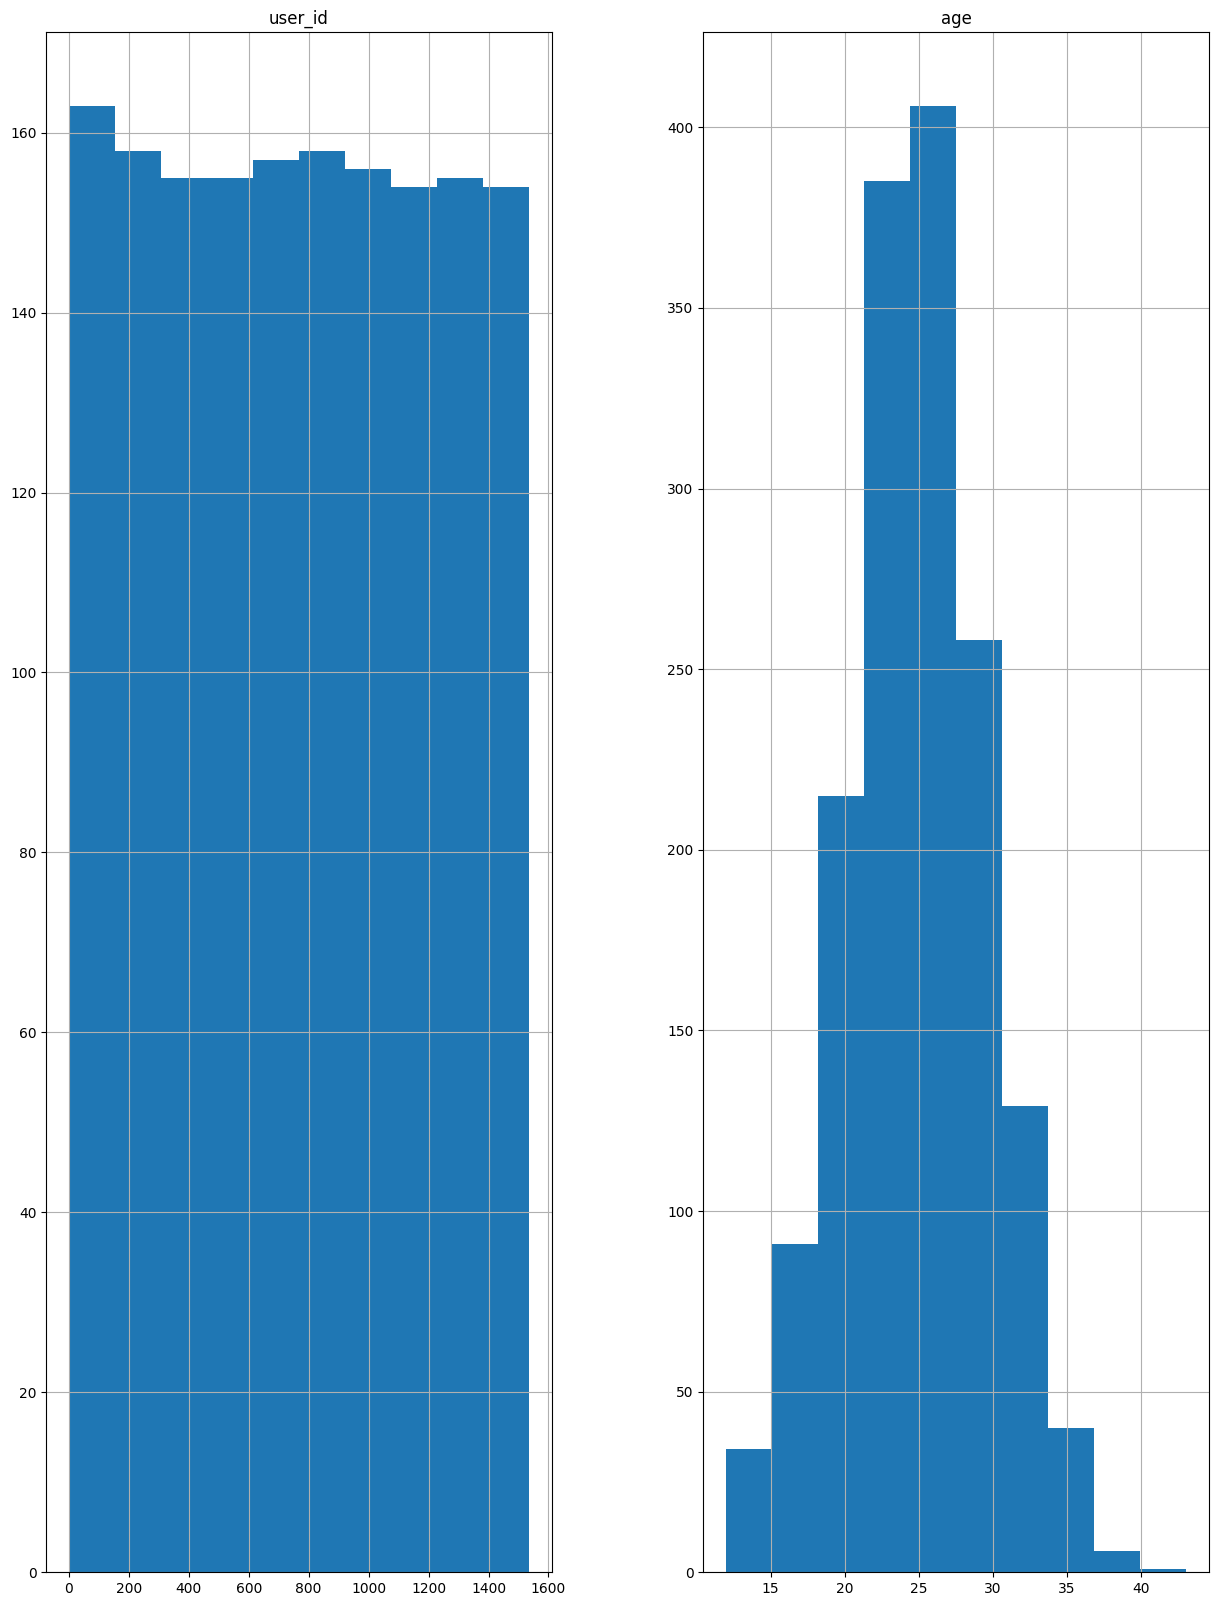

In [5]:
# Let's build diagrams for all numeric columns of the table
users.hist(figsize=(15, 20));

In [6]:
try:
    rides = pd.read_csv('rides_go.csv')
except:
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')

pd.set_option('display.max_columns', None)

In [7]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [8]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


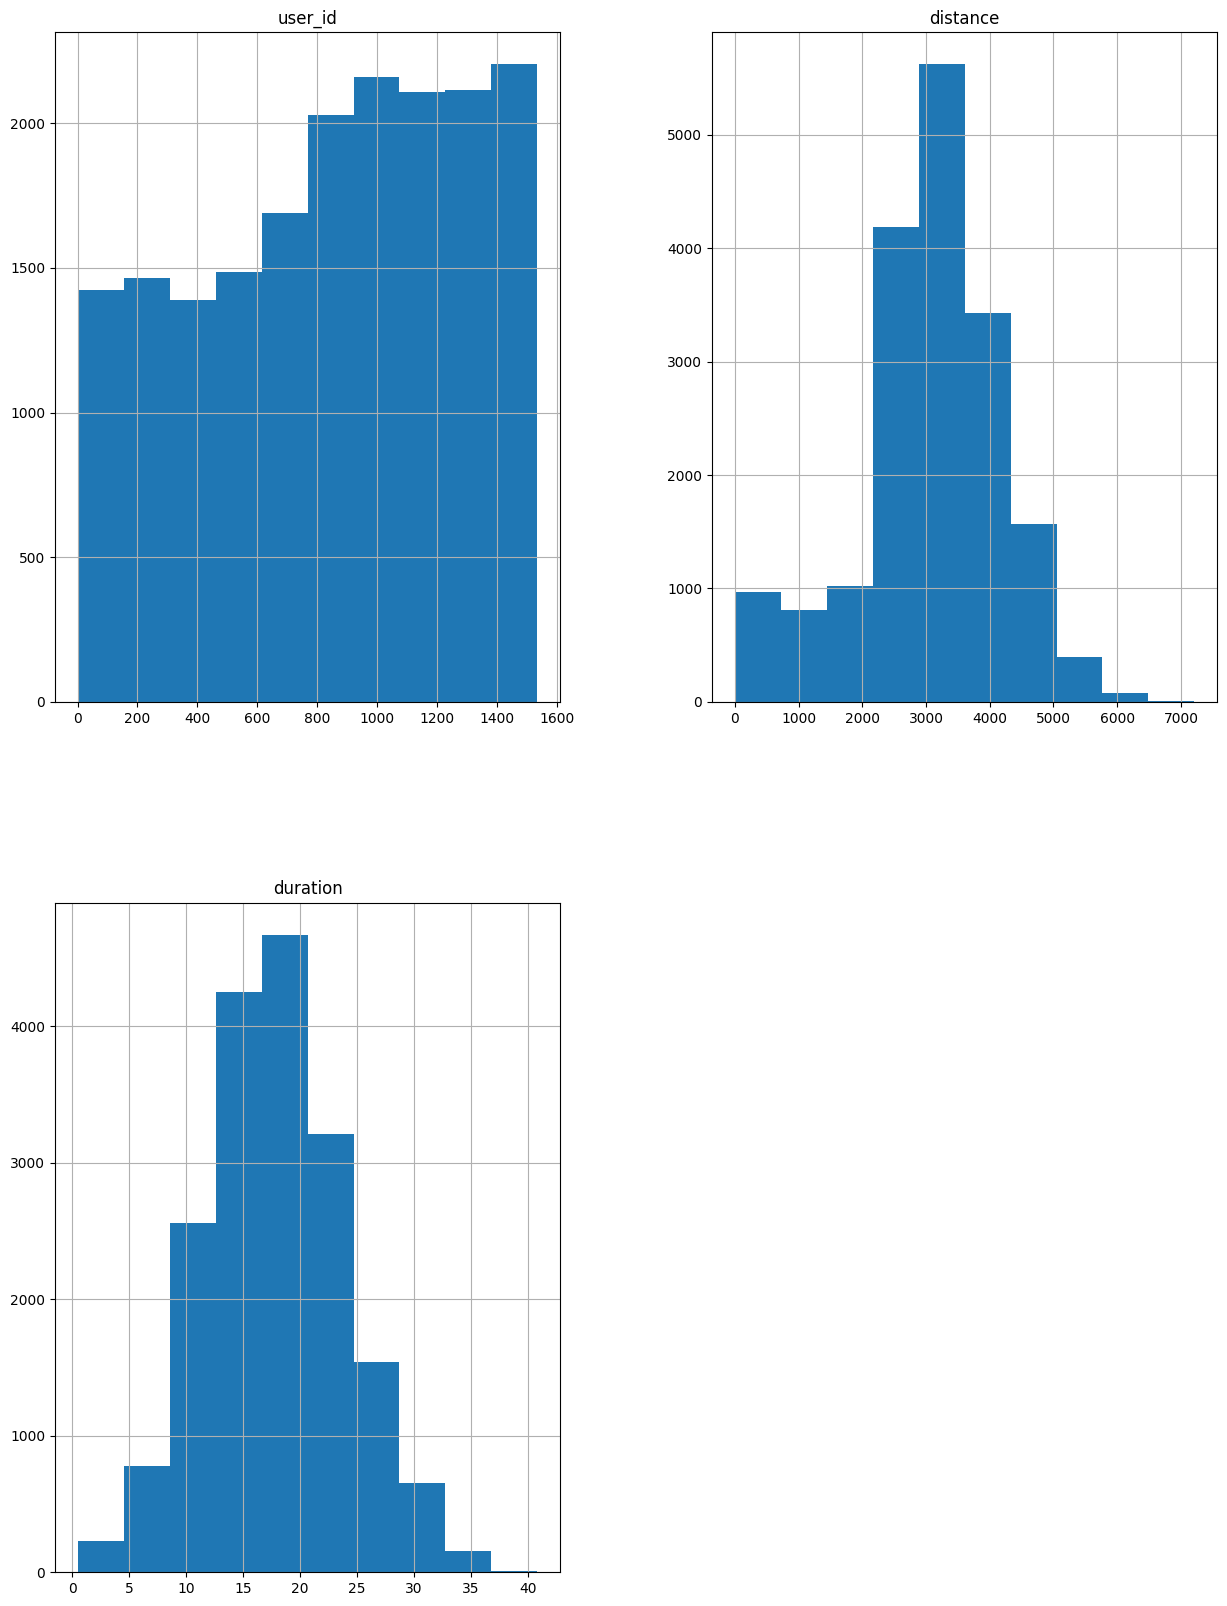

In [9]:
# Let's build diagrams for all numeric columns of the table
rides.hist(figsize=(15, 20));

In [10]:
try:
    subs = pd.read_csv('subscriptions_go.csv')
except:
    subs = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

pd.set_option('display.max_columns', None)

In [11]:
subs.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [12]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


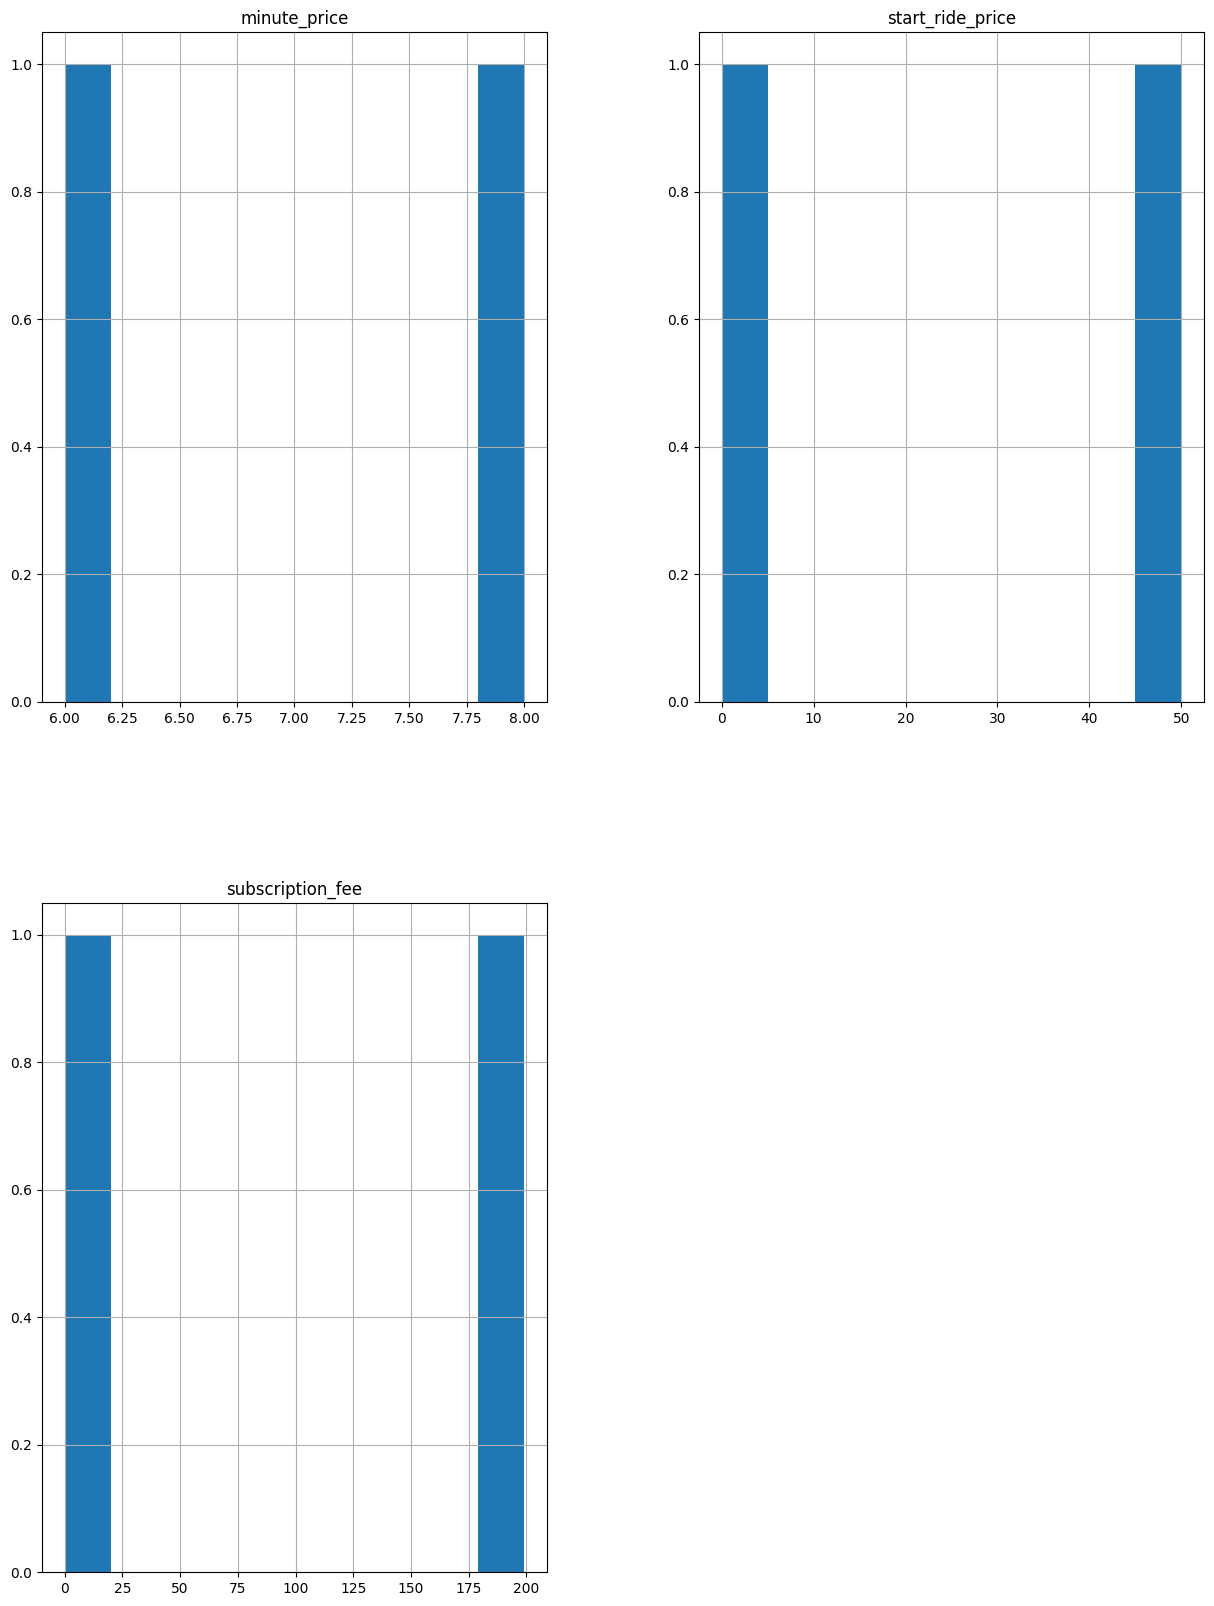

In [13]:
# Let's build diagrams for all numeric columns of the table
subs.hist(figsize=(15, 20));

**Conclusion: we have opened and viewed each file. As long as the data in the files match the description of the data, for example, the data on subscriptions fully correspond to the stated ones.**

#### Step 2. Data Preprocessing

In [14]:
# Let's convert the date column to the date and time format
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [15]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [16]:
# Let's add a column with the month number to the table with trips
rides['month_number'] = pd.DatetimeIndex(rides['date']).month

In [17]:
# Let's check that the column has been created
rides.head()

,user_id,distance,duration,date,month_number
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [18]:
# Add a column with the year
rides['year'] = pd.DatetimeIndex(rides['date']).year

In [19]:
rides.head()

,user_id,distance,duration,date,month_number,year
0,1,4409.919140,25.599769,2021-01-01,1,2021
1,1,2617.592153,15.816871,2021-01-18,1,2021
2,1,754.159807,6.232113,2021-04-20,4,2021
3,1,2694.783254,18.511000,2021-08-11,8,2021
4,1,4028.687306,26.265803,2021-08-28,8,2021


In [20]:
# Let's check for which years the information is presented in the table
rides['year'].unique()

array([2021], dtype=int64)

In [21]:
# Let's check how many gaps there are in our tables
users.isna().sum()
rides.isna().sum()
subs.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Conclusion: there are no gaps.**

In [22]:
# Let's check how many explicit duplicates there are in our tables
users.duplicated().sum()

31

In [23]:
rides.duplicated().sum()

0

In [24]:
subs.duplicated().sum()

0

In [25]:
# Let's count the share of gaps
users.duplicated().mean()

0.019808306709265176

In [26]:
# Let's remove explicit duplicates from the table with users
users = users.drop_duplicates()
users = users.reset_index(drop=True)

In [27]:
# Let's check that the deletion went correctly
users.duplicated().sum()

0

**Let's check if there are implicit duplicates in the table with users.**

In [28]:
users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [29]:
users['age'].unique()

array([22, 31, 20, 26, 28, 25, 23, 21, 18, 27, 24, 29, 32, 14, 19, 30, 17,
       12, 35, 33, 13, 15, 37, 16, 34, 38, 36, 39, 43], dtype=int64)

In [30]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [31]:
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

**Conclusion: at the data preprocessing stage, we checked for gaps in the tables, explicit and implicit duplicates. We found and deleted 31 explicit duplicates in the users table. No implicit duplicates were found.**

#### Step 3. Research Data Analysis

##### Let's analyze the frequency of occurrence of cities.

In [32]:
# First we will make a pivot table grouped by the number of cities
cities = users.pivot_table(index='city', values='user_id', aggfunc=['count']).reset_index()

In [33]:
cities.head()

,city,count
,,user_id
0,Екатеринбург,204
1,Краснодар,193
2,Москва,168
3,Омск,183
4,Пятигорск,219


In [34]:
# Let's get rid of the multi-indexes in the resulting table
cities.columns = ['city', 'user_id_count']
cities.head()

,city,user_id_count
0,Екатеринбург,204
1,Краснодар,193
2,Москва,168
3,Омск,183
4,Пятигорск,219


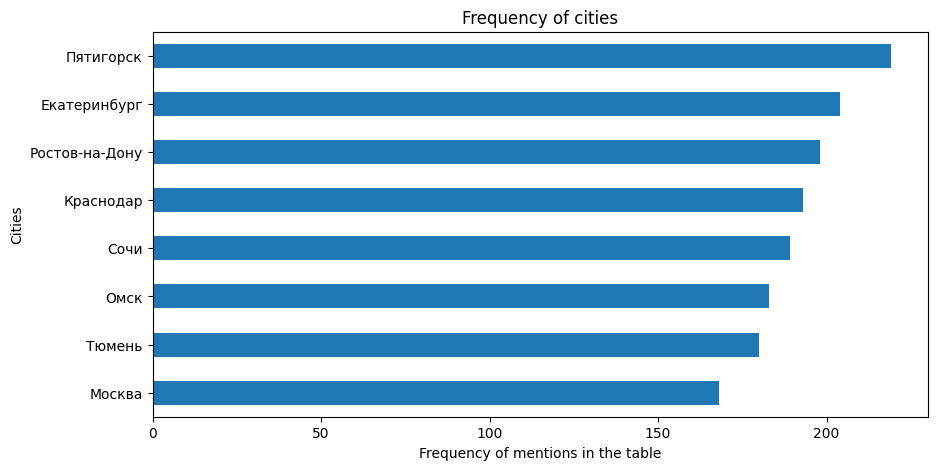

In [35]:
# Let's build a bar chart visualizing the representation of cities in the table
cities.sort_values(by='user_id_count', ascending=True).plot(x='city', y='user_id_count', 
                                                            grid=False, figsize=(10, 5), kind='barh', rot=0,
                                                           legend = None, title = 'Frequency of cities')
plt.xlabel("Frequency of mentions in the table")
plt.ylabel("Cities")
plt.show()

**Conclusion: the representation of cities is approximately the same, it cannot be said that some city is poorly represented. The leaders in representation are Pyatigorsk and Yekaterinburg. Moscow is the least represented.**

##### Let's analyze the ratio of users with a subscription and without a subscription.

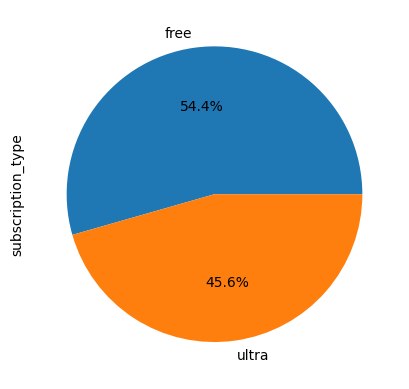

In [36]:
users['subscription_type'].value_counts().plot(kind='pie', autopct='%.1f%%');

**Conclusion: slightly more than half of users use the service without a subscription.**

##### Let's analyze the age of users.

<AxesSubplot:>

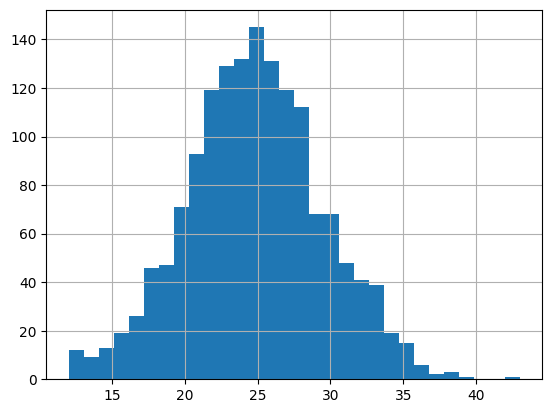

In [37]:
users['age'].hist(grid=True, bins=30)

**Conclusion: the service is most used by people aged 22 to 28 years, most of the customers are about 25 years old.**

##### Let's analyze the distance that the user has covered in one trip.

<AxesSubplot:>

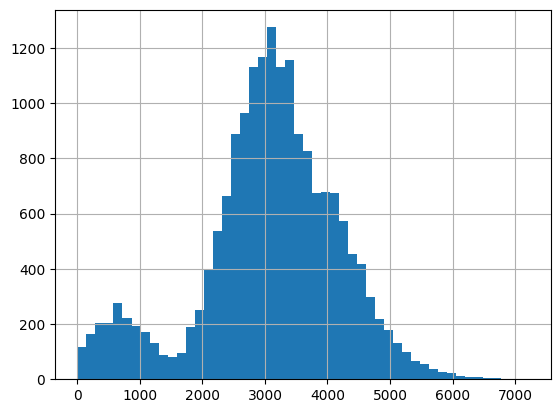

In [38]:
rides['distance'].hist(grid=True, bins=50)

**Conclusion: as a rule, users ride scooters at a distance of 2600 to 3500 meters.**

##### Let's analyze the duration of trips.

<AxesSubplot:>

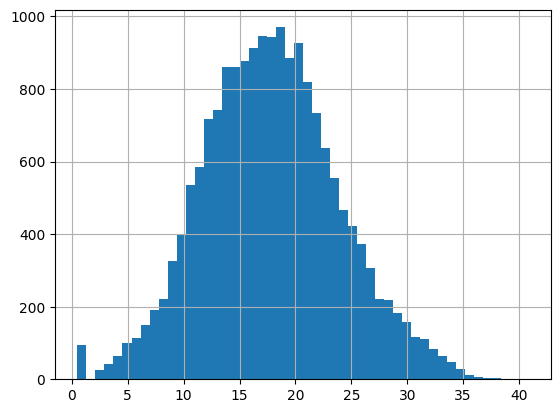

In [39]:
rides['duration'].hist(grid=True, bins=50)

**Conclusion: most trips range from 13 to 22 minutes.**

##### At the stage of research data analysis, we received general information about users and trips.
We learned the following:
1. The leading cities in terms of representation are Pyatigorsk and Yekaterinburg.
2. Slightly more than half of users use the service without a subscription.
3. People aged 22 to 28 use the service the most.
4. As a rule, users ride scooters at a distance of 2600 to 3500 meters.
5. Most trips range from 13 to 22 minutes.

#### Step 4. Combining Data

In [40]:
# Let's combine data about users, trips and subscriptions into one table
general = rides.merge(users,on='user_id',how='left')

In [41]:
general_2 = general.merge(subs, on='subscription_type',how='left')

In [42]:
# Let's check that the merge went correctly
general_2.head(10)

,user_id,distance,duration,date,month_number,year,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,2021,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,2021,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,2021,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,2021,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,2021,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,2021,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,2021,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,2021,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,2021,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,2021,Кира,22,Тюмень,ultra,6,0,199


In [43]:
general_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month_number       18068 non-null  int64         
 5   year               18068 non-null  int64         
 6   name               18068 non-null  object        
 7   age                18068 non-null  int64         
 8   city               18068 non-null  object        
 9   subscription_type  18068 non-null  object        
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory 

In [44]:
# Let's divide the resulting table into two parts: for users with a subscription and without
free = general_2.query('subscription_type == "free"')
ultra = general_2.query('subscription_type == "ultra"')

In [45]:
# Let's check that the tables were created correctly
free.head(10)

,user_id,distance,duration,date,month_number,year,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,2021,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,2021,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,2021,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,2021,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,2021,Айдар,22,Омск,free,8,50,0
6505,700,4342.002254,22.368009,2021-02-23,2,2021,Айдар,22,Омск,free,8,50,0
6506,700,3798.334905,18.243756,2021-03-03,3,2021,Айдар,22,Омск,free,8,50,0
6507,700,2984.551206,15.424899,2021-04-09,4,2021,Айдар,22,Омск,free,8,50,0
6508,700,3360.107141,16.765497,2021-06-12,6,2021,Айдар,22,Омск,free,8,50,0
6509,700,2567.543847,11.312160,2021-06-23,6,2021,Айдар,22,Омск,free,8,50,0


In [46]:
ultra.head(10)

,user_id,distance,duration,date,month_number,year,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,2021,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,2021,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,2021,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,2021,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,2021,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,2021,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,2021,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,2021,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,2021,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,2021,Кира,22,Тюмень,ultra,6,0,199


##### We visualize information about the distance and travel time for both types of users

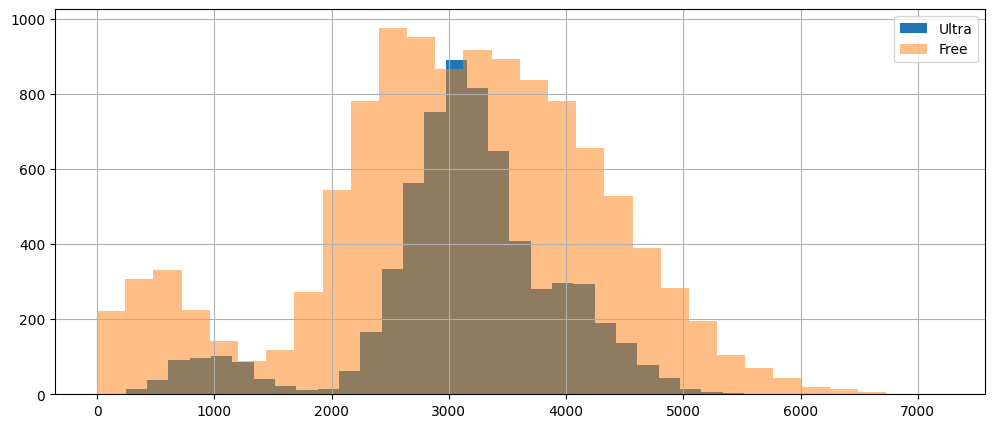

In [47]:
plt.figure(figsize = (12, 5))
ultra['distance'].hist(bins = 30)
free['distance'].hist(bins = 30, alpha = .5)
plt.legend(['Ultra', 'Free'])
plt.show()

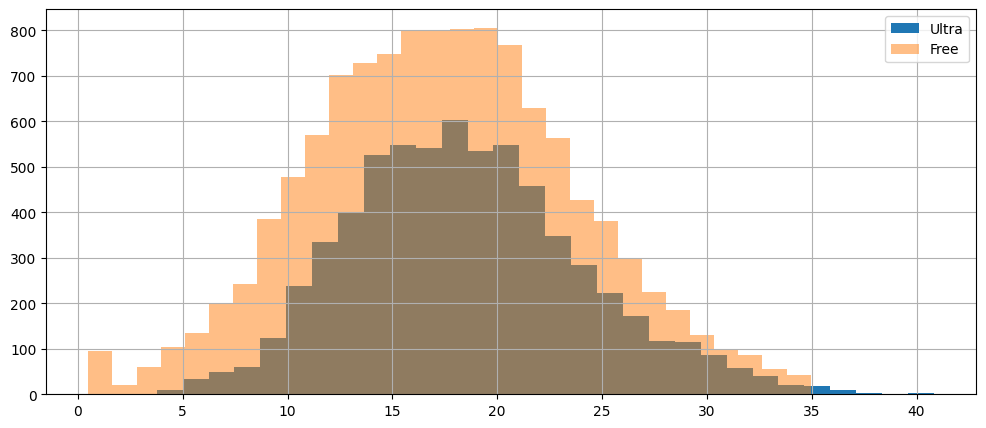

In [48]:
plt.figure(figsize = (12, 5))
ultra['duration'].hist(bins = 30)
free['duration'].hist(bins = 30, alpha = .5)
plt.legend(['Ultra', 'Free'])
plt.show()

**Conclusion: users without a subscription most often drive a distance from 2500 to 3700 meters, the most popular trip duration for such users varies from 12 to 22 minutes.**
**Users with a subscription most often drive a distance from 2,800 to 3,300 meters, the most popular trip duration for such users varies from 16 to 22 minutes.
Accordingly, we can say that different types of users use the service in different ways.**

#### Step 5. Revenue calculation

In [49]:
# To begin with, let's round up the values of the duration of trips
general_2['duration'] = round(general_2['duration'], 0)

In [50]:
general_2.head()

,user_id,distance,duration,date,month_number,year,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26.0,2021-01-01,1,2021,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16.0,2021-01-18,1,2021,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.0,2021-04-20,4,2021,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19.0,2021-08-11,8,2021,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.0,2021-08-28,8,2021,Кира,22,Тюмень,ultra,6,0,199


In [51]:
# Create a summary table in which the total distance, the number of trips will be summarized,
# total travel time for each user for each month
income = general_2.pivot_table(index=['user_id', 'month_number'], 
                               values=['distance', 'name', 'duration', 'subscription_type'], 
                               aggfunc={'distance': 'sum', 'name' : 'count', 'duration' : 'sum', 'subscription_type' : 'max'})

In [52]:
income.head()

distance  duration  name subscription_type
user_id month_number                                               
1       1             7027.511294      42.0     2             ultra
        4              754.159807       6.0     1             ultra
        8             6723.470560      45.0     2             ultra
        10            5809.911100      32.0     2             ultra
        11            7003.499363      53.0     3             ultra

**Now let's calculate the revenue for each client for each month. To do this, we will create an auxiliary function that will count revenue depending on the value of the subscription_type column.**

In [53]:
def function(row):
    count = row['name']
    duration = row['duration']
    subscription_type = row['subscription_type']
    start_ultra = 0
    start_free = 50
    minute_price_ultra = 6
    minute_price_free = 8
    fee_ultra = 199
    fee_free = 0
    if subscription_type == 'ultra':
        return (start_ultra * count) + (duration * minute_price_ultra) + fee_ultra
    if subscription_type == 'free':
        return (start_free * count) + (duration * minute_price_free) + fee_free
    

In [54]:
# Create a column with revenue values
income['income'] = income.apply(function, axis=1)

In [55]:
income.head()

distance  duration  name subscription_type  income
user_id month_number                                                       
1       1             7027.511294      42.0     2             ultra   451.0
        4              754.159807       6.0     1             ultra   235.0
        8             6723.470560      45.0     2             ultra   469.0
        10            5809.911100      32.0     2             ultra   391.0
        11            7003.499363      53.0     3             ultra   517.0

In [56]:
# Rename the columns to more understandable ones
income.columns = ['total_distance', 'total_duration', 'trips_number', 'subscription_type', 'income']

In [57]:
income.head()

total_distance  total_duration  trips_number  \
user_id month_number                                                 
1       1                7027.511294            42.0             2   
        4                 754.159807             6.0             1   
        8                6723.470560            45.0             2   
        10               5809.911100            32.0             2   
        11               7003.499363            53.0             3   

                     subscription_type  income  
user_id month_number                            
1       1                        ultra   451.0  
        4                        ultra   235.0  
        8                        ultra   469.0  
        10                       ultra   391.0  
        11                       ultra   517.0

In [58]:
income.groupby('subscription_type')['income'].mean()

subscription_type
free     321.753457
ultra    358.589676
Name: income, dtype: float64

##### In this section, we have aggregated information by users. For each user monthly, we calculated revenue, total distance, total travel time, total number of trips.

#### Step 6. Hypothesis Testing

##### Let's test the hypothesis that users with a subscription spend more time on trips.

**We will proceed as follows: using the Hypothesis of the equality of the averages of the two general aggregates, we calculate the p-value.
The duration of trips of users with and without a subscription will be taken as two general aggregates.
Let's formulate a null hypothesis: the average travel time of users without a subscription is equal to the average travel time of users with a subscription.
Alternative hypothesis: the average travel time of users with a subscription is greater than the average travel time of users without a subscription.
Also, for verification, we will calculate the actual average duration of the trip for each type of user.**

In [59]:
# Let 's calculate the size of the general aggregates
len(free['duration'])

11568

In [60]:
len(ultra['duration'])

6500

In [80]:
# Let's calculate the p-value
sample_2 = free['duration']
sample_1 = ultra['duration']
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, alternative='greater', equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('It was not possible to reject the null hypothesis')

p-value: 5.675781377128977e-37
We reject the null hypothesis


In [62]:
# To check, we will calculate the actual average values of the duration of trips
sample_1.mean()

18.54198516280583

In [63]:
sample_2.mean()

17.39090929866399

**Conclusion: since the p-value turned out to be less than the significance level, it can be concluded that users with a subscription spend more time on the trip.
A comparison of the actual average values of trip durations also confirms our conclusion (the average value of the trip duration of users with a subscription is 6% more than the average value of the trip duration of users without a subscription).**

##### Let's test the hypothesis that users with a subscription drive less than 3130 meters per trip.

**We will proceed as follows: calculate the p-value and compare it with the significance level.
Null hypothesis: users with a subscription drive 3130 meters per trip.**
**Alternative hypothesis: users with a subscription drive less than 3130 meters per trip.**

In [81]:
sample = ultra['distance']
optimal_distance = 3130
alpha = 0.05
results = st.ttest_1samp(sample, optimal_distance, alternative='less')
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis: users with a subscription drive less than 3130 meters')
else:
    print('It was not possible to reject the null hypothesis: users with a subscription drive an average of 3130 meters')

p-value: 0.08046311521502145
It was not possible to reject the null hypothesis: users with a subscription drive an average of 3130 meters


**Conclusion: it was not possible to reject the null hypothesis, which means that users with a subscription drive an average of 3130 meters per trip.**

##### Let's test the hypothesis that revenue from users with a subscription is higher than from users without a subscription

In [65]:
# Let's save the values of the handles for each type of user in separate variables.
income_free = income[income['subscription_type'] == 'free']['income']

In [66]:
income_free.head(10)

user_id  month_number
700      1               170.0
         2               930.0
         3               194.0
         4               170.0
         6               324.0
         7               268.0
         8               178.0
         10              444.0
         11              406.0
701      1               186.0
Name: income, dtype: float64

In [67]:
income_ultra = income[income['subscription_type'] == 'ultra']['income']

In [68]:
income_ultra.head(10)

user_id  month_number
1        1               451.0
         4               235.0
         8               469.0
         10              391.0
         11              517.0
         12              367.0
2        3               565.0
         4               433.0
         6               283.0
         7               475.0
Name: income, dtype: float64

**We will proceed as follows: using the Hypothesis of the equality of the averages of the two general aggregates, we calculate the p-value.
Revenue from users with a subscription and without will be taken as two general aggregates.**
**We formulate a null hypothesis: revenue from users without a subscription is equal to revenue from users with a subscription.**
**Alternative hypothesis: revenue from users with a subscription is greater than revenue from users without a subscription.**
**Also, for verification, we will calculate the actual average values of the deductions for each type of user.**

In [69]:
# Let 's calculate the size of the general aggregates
len(income_free)

6798

In [70]:
len(income_ultra)

4533

In [82]:
sample_2 = income_free
sample_1 = income_ultra
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, alternative='greater', equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('It was not possible to reject the null hypothesis')

p-value: 1.6046721201208006e-47
We reject the null hypothesis


In [72]:
# To check, we will calculate the actual average values of the duration of trips
sample_1.mean()

358.5896757114494

In [73]:
sample_2.mean()

321.75345689908795

**Conclusion: since the p-value turned out to be less than the significance level, it can be concluded that users with a subscription bring more revenue to the service.**
**A comparison of the actual average values of the deductions also confirms our conclusion (the average value of revenue from users with a subscription is 11% higher than the average value of revenue from users without a subscription).**

##### In this section we have tested 3 hypotheses.
We were able to establish the following:
1. Users with a subscription spend more time on the trip on average.
2. Users with a subscription drive an average of 3130 meters per trip.
3. Users with a subscription bring more revenue to the service on average.

From all of the above, we can conclude that product managers really first need to increase the number of users with a subscription and conduct promotions primarily for them.

#### Step 7. Distributions

##### Task:
The GoFast marketing department was given a task: it is necessary to hold an action with the distribution of promo codes for one free month of subscription, within which at least 100 existing customers must renew this subscription. That is, at the end of the subscription period, the user can either cancel it or extend it by making the appropriate payment.
This promotion has already been held before and as a result it turned out that after the free trial period, 10% of users renew their subscription. Find out what is the minimum number of promo codes you need to send out so that the probability of not fulfilling the plan is about 5%. Select the parameters of the distribution describing this situation, build a distribution graph and formulate an answer to the question about the number of promo codes.

##### Decision:
This situation is described by a binomial distribution, we need to find such a number of attempts that the probability of getting 100 successes or less is about 5%.

In [74]:
# Everyday logic suggests that with such a probability of success, the number of attempts cannot be less than 1000

binom.cdf(k= 100 , n= 1000 , p= 0.1 )

0.5265990812951653

In [75]:
# Significantly increase the number of attempts and see what probability we get
binom.cdf(k= 100 , n= 1500 , p= 0.1 )

3.5143393034827405e-06

In [76]:
# Let's take the number of attempts approximately in the middle from 1000 to 1500
binom.cdf(k= 100 , n= 1200 , p= 0.1 )

0.027954896834636016

In [77]:
# By a little brute force, we get that with the number of attempts 1168, the probability of getting less than 100 extensions 
# is equal to the desired approximate 5%
binom.cdf(k= 100 , n= 1168 , p= 0.1 )

0.05354590332725536

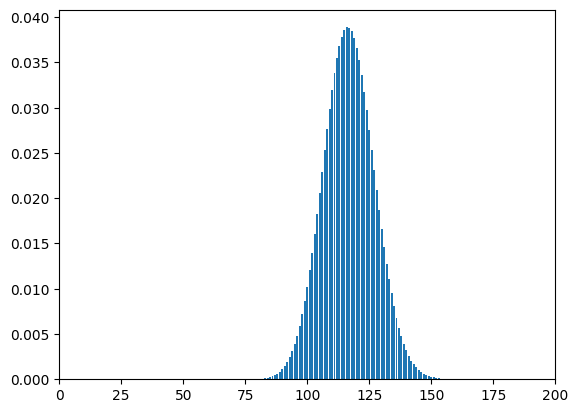

In [78]:
# Visualize the received data

n = 1168 # number of attempts
p = 0.1 # probability of success

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    


plt.bar(range(0, n + 1), distr)
plt.xlim(0, 200)
plt.show()

**Conclusion: if we send out 1168 promo codes, the probability that less than 100 customers will renew their subscription is approximately 5%.
If we want to reduce the number of promo codes required, we need to increase the likelihood of subscription renewal after the free period, for example, giving customers additional gifts for subscription renewal.**

### General conclusion:
In this project, we analyzed data from the GoFast scooter rental service. We examined the data and tested some hypotheses that can help the business grow.
In the first part of the project, we were preprocessing data, looking for missing values and removing duplicates.

In the second part, we were engaged in research analysis: we studied and visualized general information about users and trips. We managed to establish the following:
1. The leading cities in terms of representation are Pyatigorsk and Yekaterinburg.
2. Slightly more than half of users use the service without a subscription.
3. People aged 22 to 28 use the service the most.
4. As a rule, users ride scooters at a distance of 2600 to 3500 meters.
5. Most trips range from 13 to 22 minutes.

In the third part of the project, we combined data on users, trips, subscriptions into one dataframe and studied the behavior of users with different types of subscriptions.
We were able to establish that different types of users use the service a little differently:
1. Users with a subscription most often drive a distance from 2,800 to 3,300 meters, whereas users without a subscription most often drive a distance from 2,500 to 3,700 meters.
2. The most popular trip duration for users with a subscription varies from 16 to 22 minutes, whereas the duration of the trip for users without a subscription varies from 12 to 22 minutes.

In the fourth part of the project, we aggregated data monthly for each user: we found the total distance, number of trips, total duration of trips, revenue from each user.

In the fifth part of the project, we tested hypotheses on the basis of which product managers will then build the development of the service.
We came to the conclusion that Product managers first of all need to increase the number of users with a subscription and conduct promotions primarily for them, since:
1. Users with a subscription spend more time on the trip on average.
2. Users with a subscription drive an average of 3130 meters per trip, which is the optimal distance in terms of scooter wear.
3. Users with a subscription bring more revenue to the service on average.

In the sixth part of the project, we found the minimum number of promo codes in order for at least 100 customers to renew their subscription after the free period.
We managed to establish the following: if we send out 1168 promo codes, the probability that less than 100 customers will renew their subscription is approximately 5%.
If we want to reduce the number of promo codes required, then we need to increase the likelihood of subscription renewal after the free period, for example, giving customers additional gifts for subscription renewal.